<a href="https://colab.research.google.com/github/DSWoodin/Practice/blob/main/PKNU_5th/02_ML/03_GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 강의 분량
* 07월15일(월) 1시간

### 강의 자료
* GridSearchCV+평가(threshold).ipynb
* GridSearchCV+평가(threshold).txt

### 이 장에서 배우는 것
* GridSearchCV 보충학습
* threshold를 적용한 평가(보충학습)

# GridSearchCV(붓꽃 데이터)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split here
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, # Use iris instead of iris_data
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

# 최적 하이퍼 파라미터의 값과 그때의 정확도
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
from sklearn.metrics import accuracy_score # Import accuracy_score
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750
테스트 데이터 세트 정확도: 0.9667


In [ ]:
# 하이퍼파라미터를 max_depth: [2, 3, 4, 5], min_samples_split: [2, 5, 10]로 하고 cv=5인 GridSearchCV

from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# 붓꽃 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target

# Decision Tree Classifier 모델 생성
clf = DecisionTreeClassifier()

# 하이퍼파라미터 조합 설정
param_grid = {'max_depth': [2, 3, 4, 5],
              'min_samples_split': [2, 5, 10]}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(clf, param_grid, cv=5)

# GridSearchCV 실행
grid_search.fit(X, y)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최고 성능 모델의 예측 정확도
print("최고 정확도:", grid_search.best_score_)

최적의 하이퍼파라미터: {'max_depth': 3, 'min_samples_split': 2}
최고 정확도: 0.9733333333333334


# 타이타닉 로지스틱 회귀 (또는 DecisionTreeClassifier)모형의 threshold를 적용한 평가

Mounted at /content/drive


<ipython-input-4-14f03fe8bbab>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].median(), inplace=True) #또는 mean()


Threshold: 0.3
{'accuracy': '0.8045', 'precision': '0.7097', 'recall': '0.8919', 'f1-score': '0.7904', 'AUC': '0.8746'}
Threshold: 0.5
{'accuracy': '0.7989', 'precision': '0.7794', 'recall': '0.7162', 'f1-score': '0.7465', 'AUC': '0.8746'}
Threshold: 0.7
{'accuracy': '0.7877', 'precision': '0.9286', 'recall': '0.5270', 'f1-score': '0.6724', 'AUC': '0.8746'}


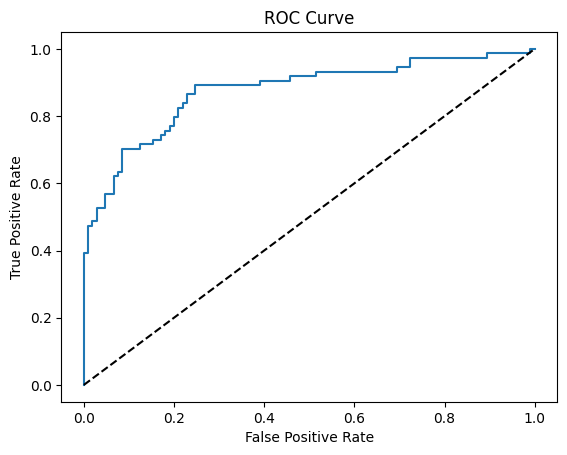

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder for categorical feature handling

def evaluate_model(y_true, y_prob, threshold=0.5):
    """
    다양한 평가 지표를 계산하는 함수

    Args:
        y_true: 실제 클래스
        y_prob: 예측 확률
        threshold: 임계값

    Returns:
        dict: 각 평가 지표 값을 담은 딕셔너리
    """

    y_pred = (y_prob >= threshold).astype(int)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc = roc_auc_score(y_true, y_prob)

    return {'accuracy': f"{accuracy:.4f}",
            'precision': f"{precision:.4f}",
            'recall': f"{recall:.4f}",
            'f1-score': f"{f1:.4f}",
            'AUC': f"{auc:.4f}"}

# 타이타닉 데이터 로드 (예시: pandas를 사용하여 코랩에서 CSV 파일 읽어오기)
from google.colab import drive
drive.mount('/content/drive')
file_path = ('/content/drive/MyDrive/data_머신러닝/titanic_train.csv')

data = pd.read_csv(file_path)

# 필요한 특징과 타겟 변수 선택
X = data[['Pclass', 'Sex', 'Age', 'Fare']]  # 예시: 몇 가지 특징 선택
y = data['Survived']

# 데이터 전처리 (결측치 처리, 원-핫 인코딩 등)
# Fill missing values in 'Age' with the median age
X['Age'].fillna(X['Age'].median(), inplace=True) #또는 mean()

# Convert 'Sex' to numerical using one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore') #기존에 학습된 범주만 인코딩
encoded_sex = encoder.fit_transform(X[['Sex']]).toarray()
encoded_sex_df = pd.DataFrame(encoded_sex, columns=encoder.get_feature_names_out(['Sex']))
X = pd.concat([X, encoded_sex_df], axis=1)
X.drop('Sex', axis=1, inplace=True) # Remove original 'Sex' column

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀(또는 DecisionTreeClassifier) 모델 생성 및 학습
model = LogisticRegression()
#model = DecisionTreeClassifier() # DecisionTreeClassifier 모델 생성 및 학습
model.fit(X_train, y_train)

# 테스트 데이터 예측 확률 계산
y_prob = model.predict_proba(X_test)[:, 1]  # 양성 클래스에 대한 예측 확률

# 다양한 임계값 설정하여 평가
for threshold in [0.3, 0.5, 0.7]:
    result = evaluate_model(y_test, y_prob, threshold)
    print(f"Threshold: {threshold}")
    print(result)

# ROC 곡선 시각화
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
